In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [37]:
!pip install ultralytics

In [38]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="A0tlu9GBdSeyX6RP2LAu")
project = rf.workspace("datasets-iafwt").project("vehicle-detection-feeic")
version = project.version(1)
dataset = version.download("yolov11")

KeyboardInterrupt: 

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLO model for faster training
model = YOLO("yolo11m.pt")  # Use YOLOv8m for good balance of speed & accuracy

# Train model with optimized settings for P100
model.train(
    data="/kaggle/working/Vehicle-Detection-1/data.yaml",
    epochs=50,
    batch=16,  # Higher batch size since P100 has better memory
    imgsz=640,  # Reduce image size for speed
    workers=4,  # Utilize more CPU cores
    optimizer="SGD",  # Faster optimizer for deep learning
    augment = True
)

In [ ]:
!kill -9 $(nvidia-smi | awk '$2=="Processes:" {p=1} p && $3~/^[0-9]+$/ {print $3}')

In [ ]:
import os
os._exit(00)  # Forcefully restart Python to clear memory

In [39]:
from ultralytics import YOLO

# Load the pretrained YOLOv11 model
model = YOLO("yolo11m.pt")  # Use "yolov11.pt" for the official pretrained model

In [40]:
results = model("/kaggle/working/Vehicle-Detection-1/test/images", save=True, project="runs/detect", name="test_results")


image 1/228 /kaggle/working/Vehicle-Detection-1/test/images/0060021ac952f49f_jpg.rf.af93b2e2f5529e3ebd9ef85310c7ed2e.jpg: 640x640 2 persons, 3 cars, 1 motorcycle, 1 bus, 5 trucks, 17.7ms
image 2/228 /kaggle/working/Vehicle-Detection-1/test/images/00e481ea1a520175_jpg.rf.8937f634a8e2e7b951fb8313cf14ae75.jpg: 640x640 3 buss, 17.7ms
image 3/228 /kaggle/working/Vehicle-Detection-1/test/images/00e481ea1a520175_jpg.rf.a5c6469e9f88c1ae081bf7b8680dbc47.jpg: 640x640 3 buss, 17.7ms
image 4/228 /kaggle/working/Vehicle-Detection-1/test/images/045f8f2e4c2e3077_jpg.rf.df1c3e07629bcede1bf8ac8ce2bb6f9f.jpg: 640x640 4 persons, 1 truck, 17.6ms
image 5/228 /kaggle/working/Vehicle-Detection-1/test/images/04c1d6c2570a7c42_jpg.rf.a970a8ed975ad5ef1b0eebda4b8d2a1b.jpg: 640x640 2 buss, 1 truck, 17.7ms
image 6/228 /kaggle/working/Vehicle-Detection-1/test/images/08c8b73e0c2e296e_jpg.rf.21d08d7133932ed4653dadaa36d77c51.jpg: 640x640 4 persons, 1 bicycle, 1 car, 2 buss, 16.4ms
image 7/228 /kaggle/working/Vehicle-D

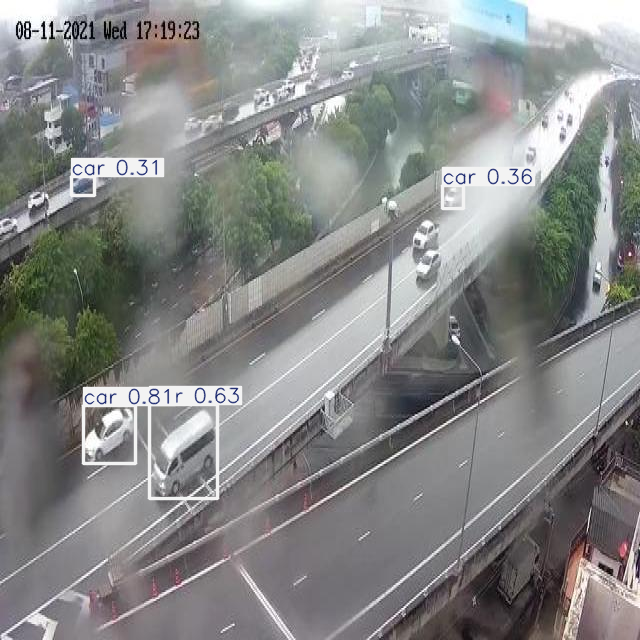

In [31]:
for result in results:
    result.show()

In [41]:
vehicle_classes = ['bicycle', 'bus', 'car', 'motorcycle', 'truck']

In [42]:
test_images_path = "/kaggle/working/Vehicle-Detection-1/test/images/*.jpg"

In [43]:
import glob
image_paths = sorted(glob.glob(test_images_path))[:10]

In [44]:
results = model(image_paths, save=True, imgsz=640)


0: 640x640 2 persons, 3 cars, 1 motorcycle, 1 bus, 5 trucks, 13.2ms
1: 640x640 3 buss, 13.2ms
2: 640x640 3 buss, 13.2ms
3: 640x640 4 persons, 1 truck, 13.2ms
4: 640x640 2 buss, 1 truck, 13.2ms
5: 640x640 4 persons, 1 bicycle, 1 car, 2 buss, 13.2ms
6: 640x640 4 persons, 1 bicycle, 1 car, 2 buss, 13.2ms
7: 640x640 1 person, 3 cars, 2 trucks, 13.2ms
8: 640x640 1 person, 1 motorcycle, 13.2ms
9: 640x640 2 persons, 1 car, 1 truck, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/test_results2


In [45]:
def count_vehicles(result):
    vehicle_count = 0
    for box in result.boxes:
        class_id = int(box.cls)  # Get class ID
        class_name = model.names[class_id]  # Convert ID to class name
        if class_name in vehicle_classes:
            vehicle_count += 1
    return vehicle_count

Image 1: Detected 10 vehicles


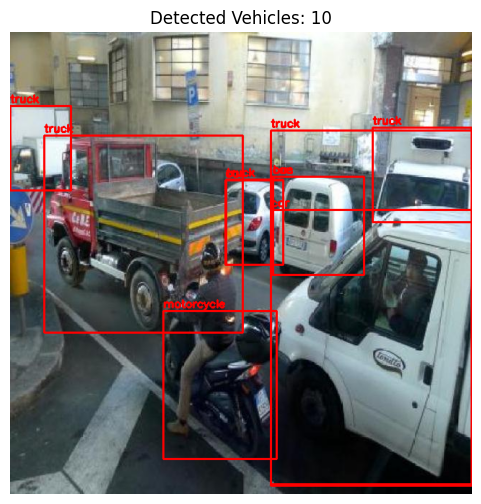

Image 2: Detected 3 vehicles


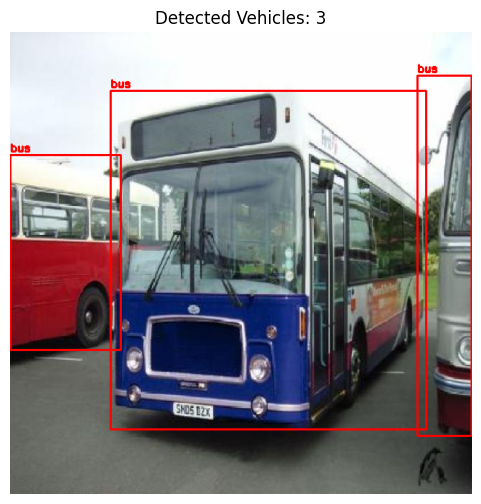

Image 3: Detected 3 vehicles


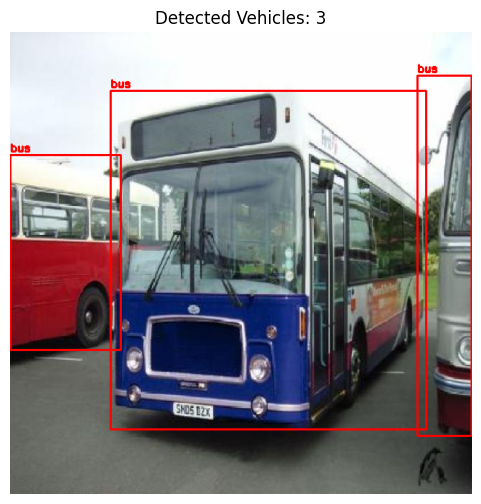

Image 4: Detected 1 vehicles


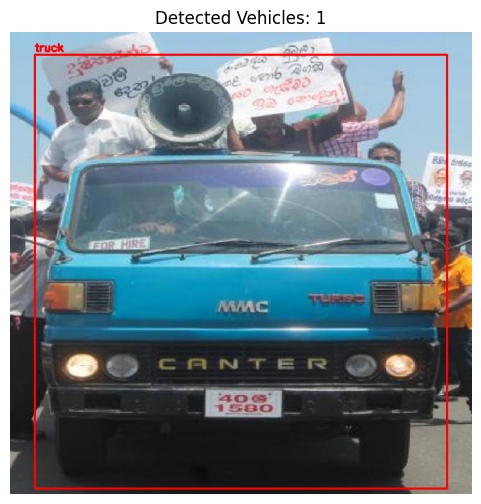

Image 5: Detected 3 vehicles


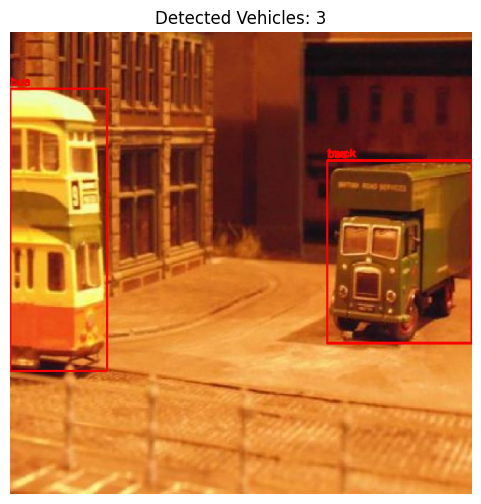

Image 6: Detected 4 vehicles


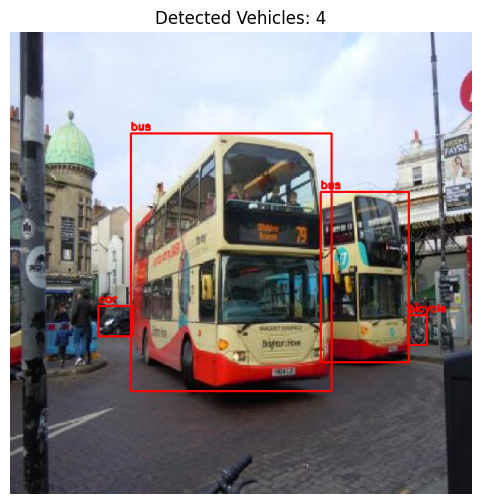

Image 7: Detected 4 vehicles


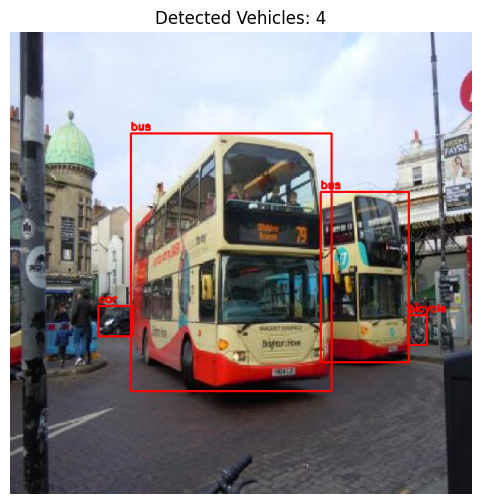

Image 8: Detected 5 vehicles


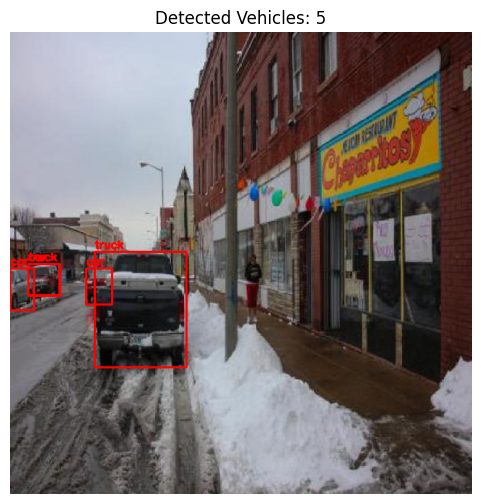

Image 9: Detected 1 vehicles


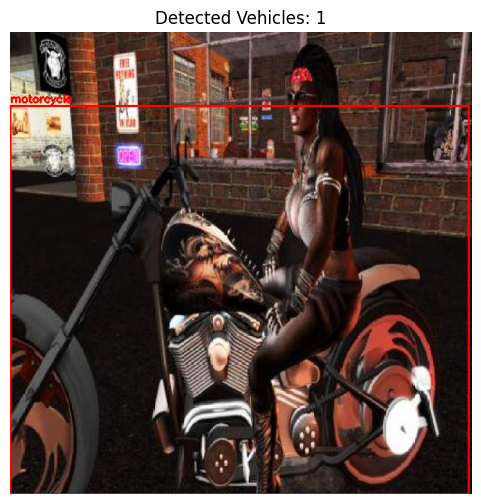

Image 10: Detected 2 vehicles


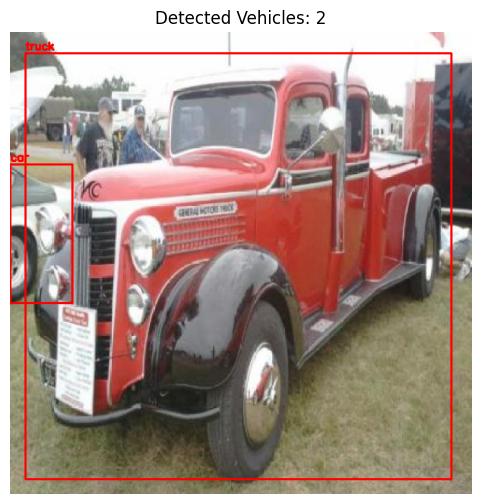

In [46]:
import cv2
import matplotlib.pyplot as plt

for i, (img_path, result) in enumerate(zip(image_paths, results)):
    img = cv2.imread(img_path)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert for Matplotlib

    # Count only vehicles
    vehicle_count = count_vehicles(result)
    print(f"Image {i+1}: Detected {vehicle_count} vehicles")  # Print vehicle count

    # Draw bounding boxes for only vehicle classes
    for box in result.boxes:
        class_id = int(box.cls)
        class_name = model.names[class_id]

        if class_name in vehicle_classes:  # Filter only vehicles
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box
            color = (255, 0, 0)  # Blue color
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, class_name, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show image with title displaying vehicle count
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Detected Vehicles: {vehicle_count}")
    plt.show()

In [47]:
import os
import pandas as pd
from ultralytics import YOLO
from datetime import datetime
import cv2
import matplotlib.pyplot as plt

# Path to test images
image_folder = "/kaggle/working/Vehicle-Detection-1/test/images"
output_folder = "processed_images"

os.makedirs(output_folder, exist_ok=True)

# Store vehicle count data
traffic_data = []

# Run detection on all images
image_files = sorted(os.listdir(image_folder))

for img_name in image_files:
    img_path = os.path.join(image_folder, img_name)
    
    # Predict vehicles
    results = model(img_path)
    
    # Extract detected classes
    vehicle_count = 0
    for r in results:
        for box in r.boxes:
            cls_id = int(box.cls[0].item())  # Class index
            class_name = model.names[cls_id]  # Get class name
            
            # Count only vehicles
            if class_name in ["car", "bus", "truck", "motorcycle"]:  # Adjust based on dataset labels
                vehicle_count += 1
    
    # Save data
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    traffic_data.append({"timestamp": timestamp, "image": img_name, "vehicle_count": vehicle_count})

# Save as CSV
df = pd.DataFrame(traffic_data)
df.to_csv("full_traffic_data.csv", index=False)
print("Full traffic data saved!")



image 1/1 /kaggle/working/Vehicle-Detection-1/test/images/0060021ac952f49f_jpg.rf.af93b2e2f5529e3ebd9ef85310c7ed2e.jpg: 640x640 2 persons, 3 cars, 1 motorcycle, 1 bus, 5 trucks, 19.0ms
Speed: 1.8ms preprocess, 19.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/Vehicle-Detection-1/test/images/00e481ea1a520175_jpg.rf.8937f634a8e2e7b951fb8313cf14ae75.jpg: 640x640 3 buss, 17.8ms
Speed: 1.5ms preprocess, 17.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/Vehicle-Detection-1/test/images/00e481ea1a520175_jpg.rf.a5c6469e9f88c1ae081bf7b8680dbc47.jpg: 640x640 3 buss, 17.8ms
Speed: 1.7ms preprocess, 17.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/working/Vehicle-Detection-1/test/images/045f8f2e4c2e3077_jpg.rf.df1c3e07629bcede1bf8ac8ce2bb6f9f.jpg: 640x640 4 persons, 1 truck, 17.7ms
Speed: 1.4ms preprocess, 17.7ms inference, 1.2ms postprocess per image at shape

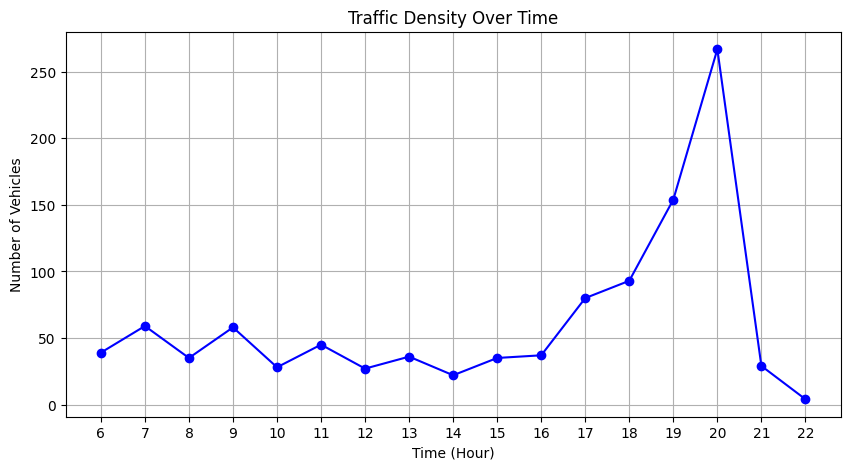

In [48]:
import numpy as np

# Load dataset
df = pd.read_csv("full_traffic_data.csv")

# Simulate timestamps if not available
start_hour = 6  # Assume data starts at 6 AM
time_slots = np.linspace(start_hour, 22, len(df))  # Spread data between 6 AM to 10 PM

df["hour"] = time_slots.astype(int)  # Assign integer hour values

# Group by hour to find peak traffic
hourly_traffic = df.groupby("hour")["vehicle_count"].sum().reset_index()

# Plot traffic density over time
plt.figure(figsize=(10, 5))
plt.plot(hourly_traffic["hour"], hourly_traffic["vehicle_count"], marker="o", linestyle="-", color="b")
plt.xlabel("Time (Hour)")
plt.ylabel("Number of Vehicles")
plt.title("Traffic Density Over Time")
plt.xticks(hourly_traffic["hour"])
plt.grid(True)
plt.show()

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

# Prepare Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(hourly_traffic["vehicle_count"].values.reshape(-1, 1))

# Convert to sequences
def create_sequences(data, seq_length=3):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)

# Convert to PyTorch tensors
X_train = torch.tensor(X, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)

# Create DataLoader
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)

# Define LSTM Model
class TrafficLSTM(nn.Module):
    def __init__(self):
        super(TrafficLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=32, num_layers=2, batch_first=True)
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1])

# Initialize Model
model = TrafficLSTM()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train Model
epochs = 100
for epoch in range(epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Predict Future Traffic
with torch.no_grad():
    last_sequence = torch.tensor(scaled_data[-3:], dtype=torch.float32).unsqueeze(0)
    future_traffic = model(last_sequence).item()

# Convert Back to Original Scale
future_traffic = scaler.inverse_transform([[future_traffic]])[0][0]
print(f"Predicted Traffic in Next Hour: {future_traffic} vehicles")

Epoch 0, Loss: 0.01692073792219162
Epoch 10, Loss: 0.031219206750392914
Epoch 20, Loss: 0.022052684798836708
Epoch 30, Loss: 0.03694158419966698
Epoch 40, Loss: 0.022507624700665474
Epoch 50, Loss: 0.021800847724080086
Epoch 60, Loss: 0.1092112585902214
Epoch 70, Loss: 0.016539694741368294
Epoch 80, Loss: 0.10371743887662888
Epoch 90, Loss: 0.10237330943346024
Predicted Traffic in Next Hour: 55.395851105451584 vehicles


In [55]:
import torch
import numpy as np

best_loss = np.inf
patience = 10  # Stop training if no improvement in 'patience' epochs
counter = 0

for epoch in range(100):  # Run up to 100 epochs
    model.train()
    optimizer.zero_grad()
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

    # Early stopping condition
    if loss.item() < best_loss:
        best_loss = loss.item()
        counter = 0  # Reset counter if loss improves
    else:
        counter += 1  # Count epochs without improvement
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break  # Stop training

Epoch 0, Loss: 0.10528212785720825
Epoch 10, Loss: 0.0963924452662468
Epoch 20, Loss: 0.08499664813280106
Epoch 30, Loss: 0.06489943712949753
Epoch 40, Loss: 0.04145026579499245
Epoch 50, Loss: 0.013630342669785023
Epoch 60, Loss: 0.005927368998527527
Early stopping at epoch 68


In [56]:
print("Last known vehicle counts:", scaler.inverse_transform(scaled_data[-5:]).flatten())
print(f"Predicted Traffic in Next Hour: {future_traffic} vehicles")

Last known vehicle counts: [         93         154         267          29           4]
Predicted Traffic in Next Hour: 55.395851105451584 vehicles


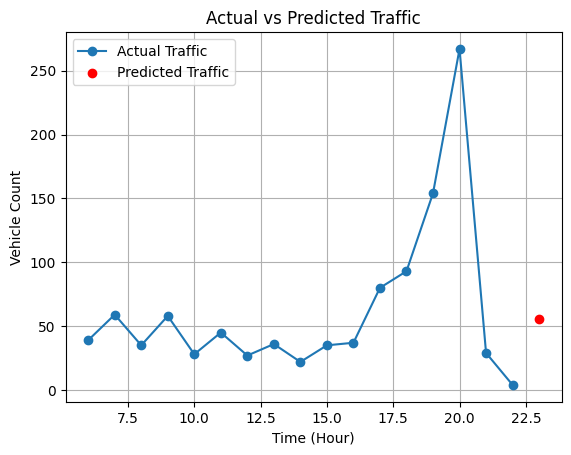

In [57]:
import matplotlib.pyplot as plt

# Plot actual traffic density
plt.plot(hourly_traffic["hour"], hourly_traffic["vehicle_count"], marker="o", label="Actual Traffic")

# Show the predicted traffic for the next hour
plt.scatter(hourly_traffic["hour"].max() + 1, future_traffic, color="red", label="Predicted Traffic", zorder=3)

plt.xlabel("Time (Hour)")
plt.ylabel("Vehicle Count")
plt.legend()
plt.title("Actual vs Predicted Traffic")
plt.grid(True)
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compare predictions with actual values
y_pred = model(X_train).detach().numpy()
y_actual = y_train.numpy()

rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"RMSE: {rmse}")

RMSE: 0.4580170214176178
